# Comparing Song Lyrics of Different Genres

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

# **Prep Work: Explore and Clean Data**

**Get Data**

In [2]:
# import csv (source: https://www.kaggle.com/mousehead/songlyrics) into pandas dataframe
lyrics_data = pd.read_csv('lyrics.csv')

**Browse Data**

In [3]:
# browse top rows of data
print("First 5 rows of data:")
lyrics_data.head()

First 5 rows of data:


,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [4]:
# see variable types
print('Variable types:')
lyrics_data.dtypes

Variable types:


index      int64
song      object
year       int64
artist    object
genre     object
lyrics    object
dtype: object

**Drop Rows with Missing Lyrics**

In [5]:
print("There are {0} rows with missing lyrics.".format(lyrics_data['lyrics'].isnull().sum()))
print("Dataframe shape: ", lyrics_data.shape)
lyrics_clean = lyrics_data.dropna(axis=0, subset=['lyrics'])
print("New dataframe shape after dropping missing lyrics: ", lyrics_clean.shape)

There are 95680 rows with missing lyrics.
Dataframe shape:  (362237, 6)
New dataframe shape after dropping missing lyrics:  (266557, 6)


**Plot Variable Distributions**

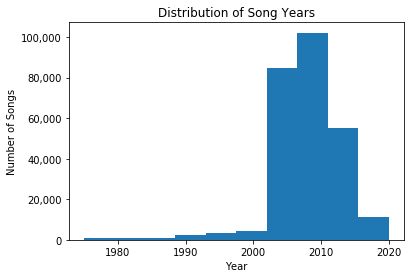

In [6]:
# browse distribution of song years in the data
ax = lyrics_clean['year'].hist(range=[1975,2020])
plt.title('Distribution of Song Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(False)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # add commas to y-axis

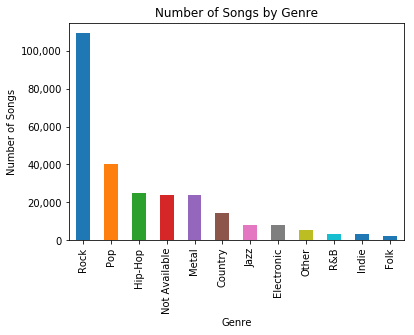

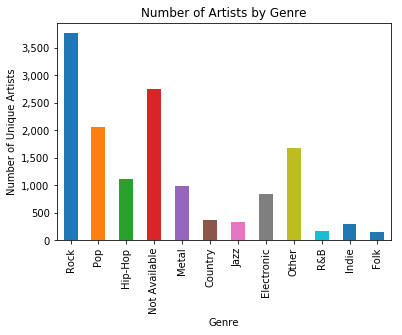

In [53]:
# browse distribution of genres in the data
ax = lyrics_clean['genre'].value_counts().plot(kind='bar')
plt.title('Number of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # add commas to y-axis
plt.show()

# preserve sort order of genres above
sorted_genres = lyrics_clean['genre'].value_counts().reset_index()
sorted_genres.drop('genre', axis = 1, inplace=True)
sorted_genres.rename(columns={'index': 'genre'}, inplace=True)

# calculate unique artists by genre, preserving sort order above
unique_artists = lyrics_clean.groupby('genre').artist.nunique().reset_index()
sorted_unique_artists = sorted_genres.merge(unique_artists, on='genre')

# plot unique artists by genre
ax = sorted_unique_artists.plot(kind='bar', x ='genre', y='artist')
plt.title('Number of Artists by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Unique Artists')
ax.legend_.remove()
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # add commas to y-axis
plt.show()

# **Part 1: Make word clouds of lyrics for top genres**

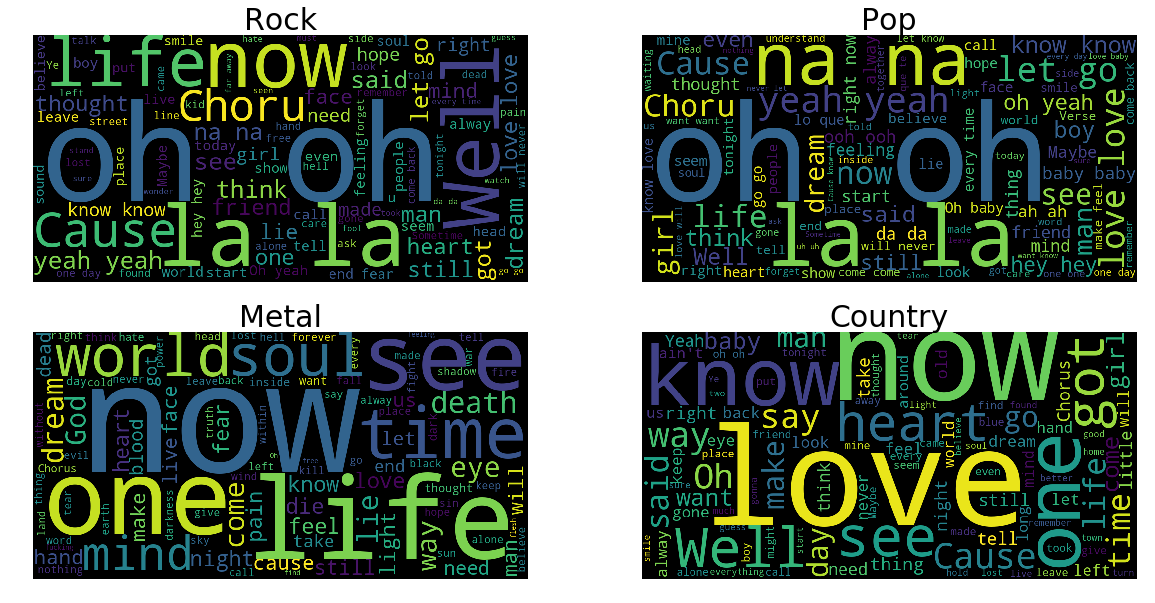

In [84]:
f, axarr = plt.subplots(2, 2, figsize=(20,10))

# Rock
rock_cloud = WordCloud(max_words=100, random_state=6, width=1000, height=500). \
    generate(' '.join(lyrics_clean[lyrics_clean.genre == 'Rock'].lyrics))
axarr[0, 0].imshow(rock_cloud)
axarr[0, 0].axis('off')
axarr[0, 0].set_title('Rock', fontsize=30)

# Pop
pop_cloud = WordCloud(max_words=100, random_state=6, width=1000, height=500). \
    generate(' '.join(lyrics_clean[lyrics_clean.genre == 'Pop'].lyrics))
axarr[0, 1].imshow(pop_cloud)
axarr[0, 1].axis('off')
axarr[0, 1].set_title('Pop', fontsize=30)

# Metal
metal_cloud = WordCloud(max_words=100, random_state=6, width=1000, height=500). \
    generate(' '.join(lyrics_clean[lyrics_clean.genre == 'Metal'].lyrics))
axarr[1, 0].imshow(metal_cloud)
axarr[1, 0].axis('off')
axarr[1, 0].set_title('Metal', fontsize=30)

# Country
country_cloud = WordCloud(max_words=100, random_state=6, width=1000, height=500). \
    generate(' '.join(lyrics_clean[lyrics_clean.genre == 'Country'].lyrics))
axarr[1, 1].imshow(country_cloud)
axarr[1, 1].axis('off')
axarr[1, 1].set_title('Country', fontsize=30)

plt.show()

# **Part 2: Compare Lyric Sentiments by Genre**

In [60]:
from textblob import TextBlob

In [68]:
lyrics_w_sent = lyrics_clean

In [69]:
lyrics_w_sent[['polarity', 'subjectivity']] = lyrics_w_sent['lyrics'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

Text(0.5,1,'Avg Polarity by Genre')

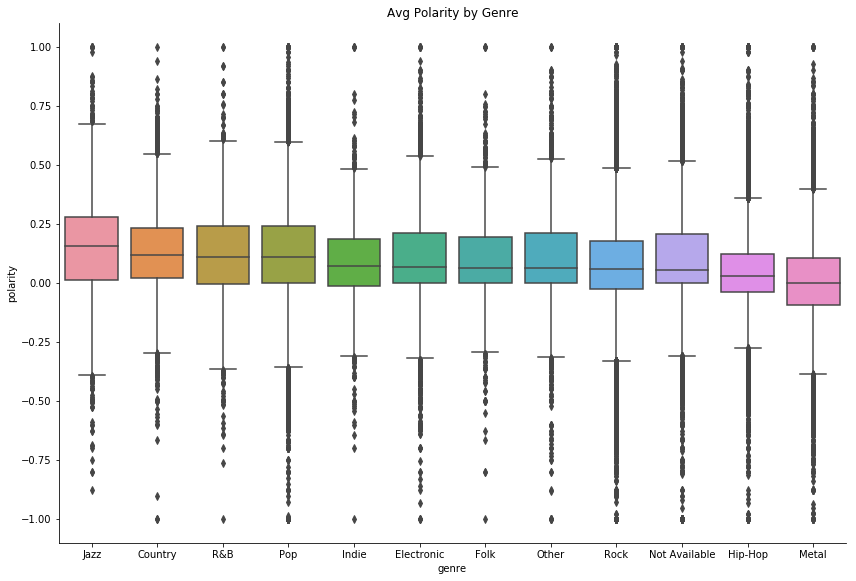

In [72]:
# Make boxplots
ranks = lyrics_w_sent.groupby('genre')['polarity'].median().fillna(0).sort_values()[::-1].index
sns.factorplot(kind='box', y='polarity', x='genre', data=lyrics_w_sent, size=8, aspect=1.5, order = ranks)
plt.title('Avg Polarity by Genre')

# **Part 3: Predict Whether Song Lyrics are Pop or Metal**

In [6]:
lyrics_pop_metal = lyrics_clean[(lyrics_clean.genre=='Pop') | (lyrics_clean.genre=='Metal')]
lyrics_pop_metal.head()

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


In [7]:
# define X and y
X = lyrics_pop_metal.lyrics
y = lyrics_pop_metal.genre

In [8]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(48168,)
(16057,)


C:\Users\azimmermann\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# instantiate the vectorizer
vect = CountVectorizer()

In [11]:
# learn training data vocabulary, then create document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_train_dtm

<48168x154848 sparse matrix of type '<class 'numpy.int64'>'
	with 4232753 stored elements in Compressed Sparse Row format>

In [12]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<16057x154848 sparse matrix of type '<class 'numpy.int64'>'
	with 1379687 stored elements in Compressed Sparse Row format>

In [13]:
# train a Naive Bayes model using X_train_dtm
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [15]:
# calculate accuracy of class predictions
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.848228187083515


In [85]:
y_test.value_counts()

Hip-Hop    6235
Metal      5918
Name: genre, dtype: int64

# Archive of Unused Code (for Future Updates)

In [83]:
y_train.value_counts()

Hip-Hop    18615
Metal      17841
Name: genre, dtype: int64

In [30]:
# confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[5758  477]
 [ 601 5317]]


In [31]:
# predict (poorly calibrated) probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.15267498e-135, 4.70905713e-088, 9.99999989e-001, ...,
       1.41421672e-038, 1.50126599e-141, 1.00000000e+000])

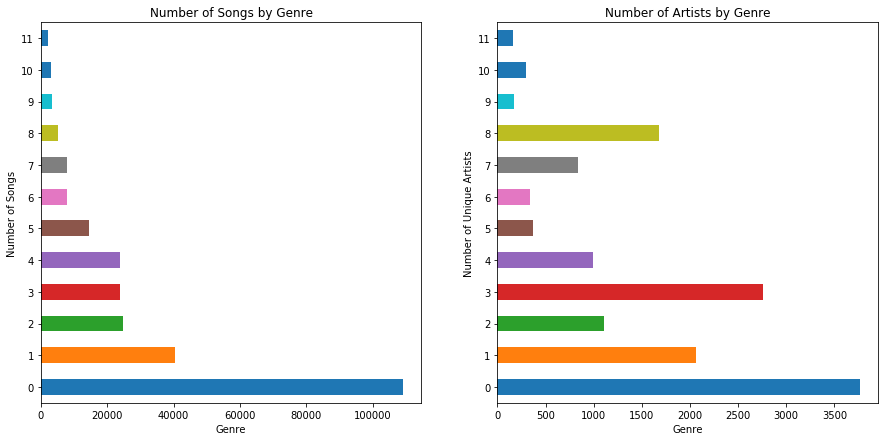

In [12]:
f, axarr = plt.subplots(nrows=1, ncols=2)

# browse distribution of genres in the data
lyrics_clean['genre'].value_counts().plot(kind='barh', ax=axarr[0], figsize=(15,7))
axarr[0].set_title('Number of Songs by Genre')
axarr[0].set_xlabel('Genre')
axarr[0].set_ylabel('Number of Songs')
axarr[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # add commas to y-axis

# plot unique artists by genre
sorted_unique_artists.plot(kind='barh', x ='genre', y='artist', ax=axarr[1])
axarr[1].set_title('Number of Artists by Genre')
axarr[1].set_xlabel('Genre')
axarr[1].set_ylabel('Number of Unique Artists')
axarr[1].legend_.remove()
axarr[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # add commas to y-axis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

for lyric in lyrics_tester:
    vs = vader.polarity_scores(lyric)
    print("{:-<65} {}".format(lyric, str(vs)))